#### Feature Selection with Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor as rf

In [2]:
# Data overview
# Source: nasa prognostics repository - Turbofan engine degradation simulation
df = pd.read_csv('test2.csv')
print(df.shape)
df.head()

(20631, 26)


,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
df.columns

Index(['unit', 'cycle', 'op_1', 'op_2', 'op_3', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

In [4]:
# Create new label - RUL(Remaining Useful Life)
one_unit = df.loc[df['unit'] == 3]
one_unit.tail()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
653,3,175,-0.0030,0.0004,100.0,518.67,643.15,1603.74,1424.17,14.62,...,520.34,2388.14,8238.86,8.5066,0.03,396,2388,100.0,38.49,22.9909
654,3,176,-0.0008,0.0002,100.0,518.67,643.93,1595.61,1438.51,14.62,...,520.91,2388.12,8251.82,8.5245,0.03,396,2388,100.0,38.49,23.0656
655,3,177,-0.0041,-0.0002,100.0,518.67,643.68,1601.21,1423.50,14.62,...,520.19,2388.16,8249.86,8.5286,0.03,397,2388,100.0,38.37,23.0336
656,3,178,-0.0010,0.0001,100.0,518.67,643.66,1606.50,1430.55,14.62,...,520.14,2388.12,8253.84,8.5351,0.03,399,2388,100.0,38.57,23.1323
657,3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,...,519.53,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562


In [5]:
cy_max = np.max(one_unit['cycle'])
cy_max - one_unit['cycle'] + 1

479    179
480    178
481    177
482    176
483    175
      ... 
653      5
654      4
655      3
656      2
657      1
Name: cycle, Length: 179, dtype: int64

In [6]:
rul_df = pd.DataFrame()

for i in range(100):
    
    one_unit = df.loc[df['unit'] == i + 1]
    cy_max = np.max(one_unit['cycle'])
    one_unit['RUL'] = cy_max - one_unit['cycle'] + 1
    
    rul_df = pd.concat([rul_df, one_unit])

In [7]:
rul_df.to_csv('test2_modified.csv', index = False)

In [8]:
rul_df = pd.read_csv('test2_modified.csv')
rul_df.head()

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188


In [9]:
# Let's see the importances of features.
features = ['T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
label = 'RUL'

In [10]:
model = rf()
model.fit(rul_df[features], rul_df[label])

RandomForestRegressor()

In [11]:
model.feature_importances_

array([0.        , 0.02993315, 0.03161428, 0.08094161, 0.        ,
       0.00081419, 0.03917603, 0.02177288, 0.1269296 , 0.        ,
       0.44794156, 0.05060639, 0.02264202, 0.04045046, 0.03623072,
       0.        , 0.0104678 , 0.        , 0.        , 0.02589893,
       0.03458038])

In [12]:
importance = pd.DataFrame()
importance['feature'] = features
importance['imp'] = model.feature_importances_
importance

,feature,imp
0,T2,0.000000
1,T24,0.029933
2,T30,0.031614
3,T50,0.080942
4,P2,0.000000
5,P15,0.000814
6,P30,0.039176
7,Nf,0.021773
8,Nc,0.126930
9,epr,0.000000


<AxesSubplot:xlabel='imp', ylabel='feature'>

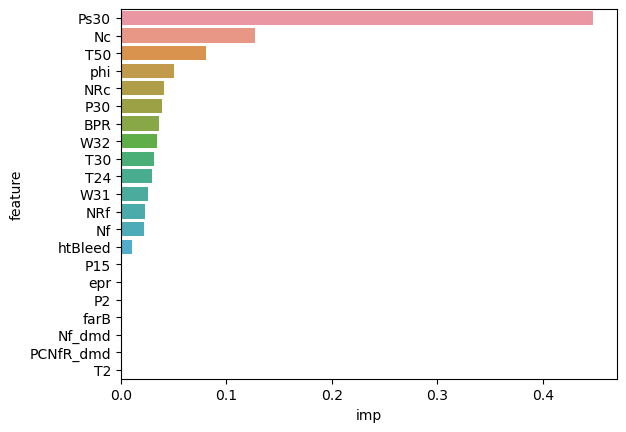

In [13]:
# Plot the importances with sorting the features
sns.barplot(data = importance.sort_values(by='imp', ascending=False), x = 'imp', y = 'feature')

<AxesSubplot:xlabel='RUL', ylabel='W32'>

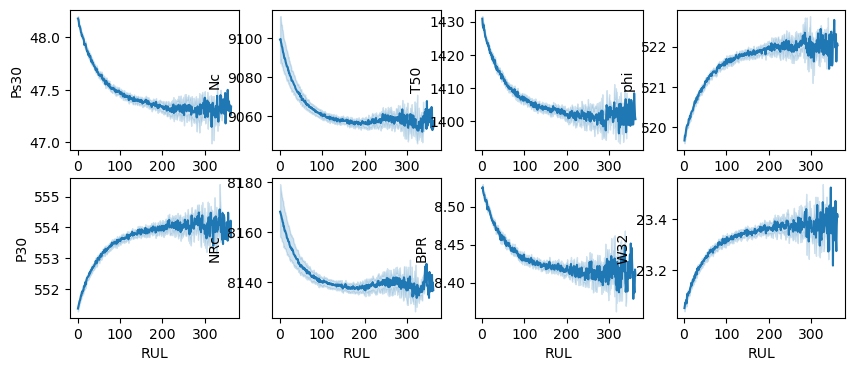

In [14]:
# See each relationship with selected featrues and RUL.
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols=4, nrows=2)

fig.set_size_inches(10, 4)

sns.lineplot(data=rul_df, x='RUL', y='Ps30', ax=ax1)
sns.lineplot(data=rul_df, x='RUL', y='Nc', ax=ax2)
sns.lineplot(data=rul_df, x='RUL', y='T50', ax=ax3)
sns.lineplot(data=rul_df, x='RUL', y='phi', ax=ax4)

sns.lineplot(data=rul_df, x='RUL', y='P30', ax=ax5)
sns.lineplot(data=rul_df, x='RUL', y='NRc', ax=ax6)
sns.lineplot(data=rul_df, x='RUL', y='BPR', ax=ax7)
sns.lineplot(data=rul_df, x='RUL', y='W32', ax=ax8)

In [15]:
# The selected features are:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 
            'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL'

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [16]:
m1 = rf(n_jobs=-1)
m1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [17]:
print(m1.score(X_train, y_train), m1.score(X_test, y_test))

0.9487015016759767 0.6272126507526246


In [18]:
# Log transformation
rul_df['RUL_log'] = rul_df['RUL'].apply(lambda x : np.log(x))
rul_df

,unit,cycle,op_1,op_2,op_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL,RUL_log
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,5.257495
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,191,5.252273
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190,5.247024
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,189,5.241747
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,188,5.236442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,5,1.609438
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,4,1.386294
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,3,1.098612
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2,0.693147


In [19]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 
            'NRc', 'BPR', 'htBleed', 'W31', 'W32']
label = 'RUL_log'

train, test = rul_df[0::2], rul_df[1::2]
train, test = train.reset_index(), test.reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [20]:
m1 = rf(n_jobs = -1)
m1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
print(m1.score(X_train, y_train), m1.score(X_test, y_test))

# The accuracy score now gets higher.

0.9794731837817018 0.8497201128333449


#### Summary
- Learned how to conduct feature selection in Python using Random Forest.
- For this data, Ps30 is the most important one, followed by Nc, T50, and the other features.